In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_low(x):
    return np.sin(8*np.pi*x)

def f_high(x):
    return (x-np.sqrt(2)) * (f_low(x))**2

num_cheap = 30
num_expensive = 10

np.random.seed(59)
X1 = np.random.rand(num_cheap)[:,None]
#X2 = np.linspace(0,1,num_expensive)[:,None]
X2 = np.random.rand(num_expensive)[:,None]
Yc = f_low(X1)

Ye = f_high(X2) + 0.001 * np.random.normal(0,1,num_expensive)[:,None]

In [2]:
from prettytable import PrettyTable
#import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error, r2_score
import emukit.examples.multi_fidelity_dgp

In [3]:
from emukit.core import ContinuousParameter, ParameterSpace
from emukit.core.initial_designs import LatinDesign
from emukit.examples.multi_fidelity_dgp.multi_fidelity_deep_gp import MultiFidelityDeepGP

/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/f

In [5]:
X=[]
X.append(X1)

In [6]:
X.append(X2)

In [7]:
Y=[]
Y.append(Yc)
Y.append(Ye)

In [8]:
print(X)

[array([[0.92403512],
       [0.15787058],
       [0.86691508],
       [0.08415694],
       [0.57357368],
       [0.28193977],
       [0.25628056],
       [0.56398041],
       [0.21982335],
       [0.6486208 ],
       [0.62775224],
       [0.41097441],
       [0.40254336],
       [0.45016207],
       [0.23392243],
       [0.1343317 ],
       [0.10471277],
       [0.47299023],
       [0.11384754],
       [0.28604699],
       [0.83821169],
       [0.31407342],
       [0.07637628],
       [0.76942701],
       [0.25796999],
       [0.93441748],
       [0.80803968],
       [0.33532961],
       [0.4913475 ],
       [0.22273411]]), array([[0.43424816],
       [0.64439393],
       [0.96176674],
       [0.43949222],
       [0.4391256 ],
       [0.64022806],
       [0.9130996 ],
       [0.55606022],
       [0.53545111],
       [0.44325942]])]


In [9]:
mf_dgp_fix_lf_mean = MultiFidelityDeepGP(X, Y, n_iter=5000)

In [10]:
mf_dgp_fix_lf_mean.name = 'mf_dgp_fix_lf_mean'

In [11]:
mf_dgp_fix_lf_mean.optimize()

In [21]:
X_test = np.linspace(0,1,99)[:,None]
#X_test = np.hstack((X_test,np.ones(99,1)))

#y_mean, y_var = mf_dgp_fix_lf_mean.predict(X_test)

In [22]:
tmp = [1.]*99
tmp = np.array(tmp).reshape(-1,1)
tmp.shape

(99, 1)

In [23]:
X_test = np.hstack((X_test,tmp))

In [24]:
print(X_test)

[[0.         1.        ]
 [0.01020408 1.        ]
 [0.02040816 1.        ]
 [0.03061224 1.        ]
 [0.04081633 1.        ]
 [0.05102041 1.        ]
 [0.06122449 1.        ]
 [0.07142857 1.        ]
 [0.08163265 1.        ]
 [0.09183673 1.        ]
 [0.10204082 1.        ]
 [0.1122449  1.        ]
 [0.12244898 1.        ]
 [0.13265306 1.        ]
 [0.14285714 1.        ]
 [0.15306122 1.        ]
 [0.16326531 1.        ]
 [0.17346939 1.        ]
 [0.18367347 1.        ]
 [0.19387755 1.        ]
 [0.20408163 1.        ]
 [0.21428571 1.        ]
 [0.2244898  1.        ]
 [0.23469388 1.        ]
 [0.24489796 1.        ]
 [0.25510204 1.        ]
 [0.26530612 1.        ]
 [0.2755102  1.        ]
 [0.28571429 1.        ]
 [0.29591837 1.        ]
 [0.30612245 1.        ]
 [0.31632653 1.        ]
 [0.32653061 1.        ]
 [0.33673469 1.        ]
 [0.34693878 1.        ]
 [0.35714286 1.        ]
 [0.36734694 1.        ]
 [0.37755102 1.        ]
 [0.3877551  1.        ]
 [0.39795918 1.        ]


In [25]:
y_mean, y_var = mf_dgp_fix_lf_mean.predict(X_test)

In [27]:
y_up = y_mean+1.96*np.sqrt(y_var)

In [28]:
y_down = y_mean - 1.96*np.sqrt(y_var)

In [29]:
X_plot = np.linspace(0,1,200)[:,None]
f_c=f_low(X_plot)
f_e=f_high(X_plot)

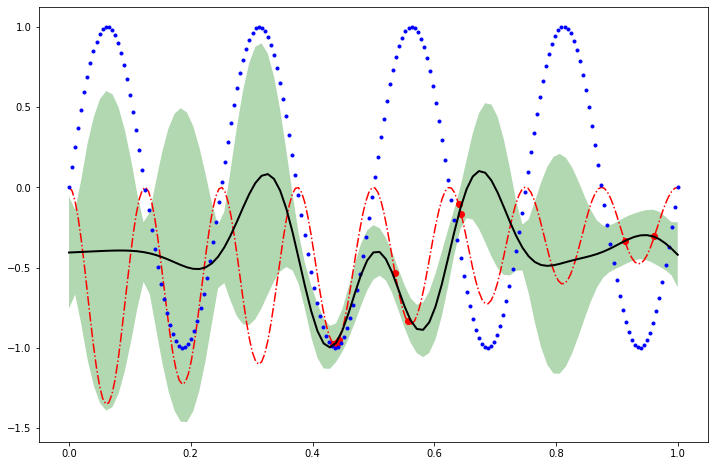

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
plt.plot(X_plot,f_c,'b.')
plt.plot(X_test[:,0],y_mean,'k-',linewidth=2)
plt.fill_between(np.array(X_test[:,0]).flatten(),np.array(y_up).flatten(),np.array(y_down).flatten(),facecolor='g',alpha=0.3)
plt.show()